In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

## Lectura de polizas.feather

 - Se considera que una cliente se dió de baja si no tiene polizas vigentes por 3 meses

In [2]:
df_polizas = pd.read_feather('../../../data/interim/polizas.feather')

In [3]:
df_polizas["NUM_SECU_POL"].isna().sum()

0

In [4]:
df_polizas["CIF_ID"].isna().sum()

1707

In [5]:
df_polizas["CIF_ID"].nunique()

412326

In [6]:
df_polizas.head(5)

,NUM_SECU_POL,FECHA_VIG_POL,FECHA_VENC_POL,COD_PLAN,FECHA_PROCESO,MCA_VIGENCIA,FECHA_VIG_ORIG_POL,MCA_AGRAVANTE,MCA_EMPLEADO,COD_INICIADOR,CAPITAL_VEHICULO,CAPITAL_ACCESORIOS,CAPITAL_ASEGURADO_COTIZACION,NRO_SOLIC_EXTERNA,NEGOCIO,MCA_POLIZA_VIP,FECHA_EMI,CANT_RENOVACION,FECHA_ANTIG,ANTIG,FECHA_VIG_POL_NPO,PROXIMA_FECHA_RENOV,NEGOCIO_DESC,CIF_ID
0,1754486179999,2018-01-28,2018-02-28,920.0,2018-01-31,S,2017-11-28,S,N,NaN,87600.0,1080.0,87600.0,nan,DEF,N,2017-11-28,3,2017-11-28,61.0,2017-11-28,2018-02-28,Mostrador,19264733.0
1,1754487779999,2018-01-28,2018-02-28,967.0,2018-01-31,S,2017-11-28,S,N,NaN,221400.0,1080.0,226800.0,nan,DEF,S,2017-11-28,3,2015-01-20,1104.0,2017-11-28,2018-05-31,Mostrador,20526578.0
2,1754488439999,2017-12-04,2018-01-04,961.0,2018-01-31,None,2017-12-04,S,N,NaN,122000.0,250.0,122000.0,nan,None,S,2017-11-28,1,2011-05-04,2406.0,2017-12-04,2018-03-04,None,17484524.0
3,1754488699999,2018-01-28,2018-02-28,961.0,2018-01-31,S,2017-11-28,S,N,NaN,71200.0,250.0,71200.0,nan,DEF,S,2017-11-28,3,2017-11-28,61.0,2017-11-28,2018-05-31,Mostrador,22299320.0
4,1754489249999,2018-01-01,2018-02-01,977.0,2018-01-31,S,2017-12-01,S,N,NaN,286200.0,1080.0,286200.0,nan,DEF,S,2017-11-28,2,2016-12-05,392.0,2017-12-01,2018-02-01,Mostrador,21511395.0


In [7]:
fechas = [col for col in df_polizas.columns if 'FECHA' in col]
df_polizas[fechas].head(5)

,FECHA_VIG_POL,FECHA_VENC_POL,FECHA_PROCESO,FECHA_VIG_ORIG_POL,FECHA_EMI,FECHA_ANTIG,FECHA_VIG_POL_NPO,PROXIMA_FECHA_RENOV
0,2018-01-28,2018-02-28,2018-01-31,2017-11-28,2017-11-28,2017-11-28,2017-11-28,2018-02-28
1,2018-01-28,2018-02-28,2018-01-31,2017-11-28,2017-11-28,2015-01-20,2017-11-28,2018-05-31
2,2017-12-04,2018-01-04,2018-01-31,2017-12-04,2017-11-28,2011-05-04,2017-12-04,2018-03-04
3,2018-01-28,2018-02-28,2018-01-31,2017-11-28,2017-11-28,2017-11-28,2017-11-28,2018-05-31
4,2018-01-01,2018-02-01,2018-01-31,2017-12-01,2017-11-28,2016-12-05,2017-12-01,2018-02-01


In [8]:
data = {col: [df_polizas[col].min(),df_polizas[col].max()] for col in fechas}
pd.DataFrame(data, index =['MIN', 'MAX'])

,FECHA_VIG_POL,FECHA_VENC_POL,FECHA_PROCESO,FECHA_VIG_ORIG_POL,FECHA_EMI,FECHA_ANTIG,FECHA_VIG_POL_NPO,PROXIMA_FECHA_RENOV
MIN,2017-12-01,2018-01-01,2018-01-31,1995-03-01,2017-09-05,1995-03-01,1995-03-01,2018-02-01
MAX,2019-06-30,2020-06-22,2019-06-30,2019-06-30,2019-06-30,2019-06-30,2019-06-30,2020-07-22


*Calculamos mes y año de vigencia*

In [3]:
df_polizas['mes_anio_vig'] = df_polizas['FECHA_VIG_POL'].dt.strftime('%Y-%m')

In [4]:
sorted(df_polizas['mes_anio_vig'].unique())

['2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06']

*Filtramos las columnas para hacer el pivot por CIF_ID*

In [5]:
to_pivot = df_polizas[["CIF_ID","NUM_SECU_POL","MCA_VIGENCIA","mes_anio_vig"]].drop_duplicates() 

In [6]:
df_polizas_pivoted = to_pivot.pivot_table(index='CIF_ID',columns=['mes_anio_vig'], values=['MCA_VIGENCIA'],aggfunc='count',fill_value=0)

- **Se detectan valores de periodos menores a enero de 2018 y otros que nunca tienen polizas vigentes**

*Seleccionamos periodos de 2018 en adelante*

In [7]:
df_polizas_pivoted.head(5)

MCA_VIGENCIA                                                  \
mes_anio_vig      2017-12 2018-01 2018-02 2018-03 2018-04 2018-05 2018-06   
CIF_ID                                                                      
1313.0                  0       1       1       1       1       1       1   
1482.0                  0       1       1       1       1       1       1   
1559.0                  0       1       1       1       1       1       1   
1779.0                  0       0       0       0       0       0       0   
2994.0                  0       1       1       1       1       1       1   

                                                                              \
mes_anio_vig 2018-07 2018-08 2018-09 2018-10 2018-11 2018-12 2019-01 2019-02   
CIF_ID                                                                         
1313.0             1       1       1       1       1       1       1       1   
1482.0             1       1       1       1       1       1       1       1   
1559.0             1       1       1       1       1       1       1       1   
1779.0             0       0       0       0       0       0       1       1   
2994.0             1       1       1       1       1       1       1       1   

                                              
mes_anio_vig 2019-03 2019-04 2019-05 2019-06  
CIF_ID                                        
1313.0             1       1       1       1  
1482.0             1       1       1       1  
1559.0             1       1       1       1  
1779.0             1       1       1       1  
2994.0             1       1       1       1

In [8]:
df_polizas_pivoted = df_polizas_pivoted.iloc[:,1:]

### Buscamos CIF_ID con tres meses consecutivos sin polizas vigentesy armamos feather con bajas

In [9]:
df_polizas_pivoted = df_polizas_pivoted.astype(str)

In [10]:
df_polizas_pivoted["history"] = df_polizas_pivoted.apply(" ".join, axis=1)

In [11]:
def simplify(x):
    return "".join(["1" if int(n)>0 else "0" for n in x.split(" ")])

df_polizas_pivoted["boolean_history"] = df_polizas_pivoted["history"].apply(simplify).values

In [12]:
df_polizas_pivoted.head(5)

MCA_VIGENCIA                                                  \
mes_anio_vig      2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07   
CIF_ID                                                                      
1313.0                  1       1       1       1       1       1       1   
1482.0                  1       1       1       1       1       1       1   
1559.0                  1       1       1       1       1       1       1   
1779.0                  0       0       0       0       0       0       0   
2994.0                  1       1       1       1       1       1       1   

                                                                              \
mes_anio_vig 2018-08 2018-09 2018-10 2018-11 2018-12 2019-01 2019-02 2019-03   
CIF_ID                                                                         
1313.0             1       1       1       1       1       1       1       1   
1482.0             1       1       1       1       1       1       1       1   
1559.0             1       1       1       1       1       1       1       1   
1779.0             0       0       0       0       0       1       1       1   
2994.0             1       1       1       1       1       1       1       1   

                                                                  history  \
mes_anio_vig 2019-04 2019-05 2019-06                                        
CIF_ID                                                                      
1313.0             1       1       1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
1482.0             1       1       1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
1559.0             1       1       1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
1779.0             1       1       1  0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1   
2994.0             1       1       1  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   

                 boolean_history  
mes_anio_vig                      
CIF_ID                            
1313.0        111111111111111111  
1482.0        111111111111111111  
1559.0        111111111111111111  
1779.0        000000000000111111  
2994.0        111111111111111111

*Filtramos aquellos registros que nunca tienen polizas vigentes en el periodo analizado*

In [13]:
df_polizas_pivoted[df_polizas_pivoted["history"] == "0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0"].head()

MCA_VIGENCIA                                                  \
mes_anio_vig      2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07   
CIF_ID                                                                      
60790.0                 0       0       0       0       0       0       0   
73902.0                 0       0       0       0       0       0       0   
98997.0                 0       0       0       0       0       0       0   
121903.0                0       0       0       0       0       0       0   
125785.0                0       0       0       0       0       0       0   

                                                                              \
mes_anio_vig 2018-08 2018-09 2018-10 2018-11 2018-12 2019-01 2019-02 2019-03   
CIF_ID                                                                         
60790.0            0       0       0       0       0       0       0       0   
73902.0            0       0       0       0       0       0       0       0   
98997.0            0       0       0       0       0       0       0       0   
121903.0           0       0       0       0       0       0       0       0   
125785.0           0       0       0       0       0       0       0       0   

                                                                  history  \
mes_anio_vig 2019-04 2019-05 2019-06                                        
CIF_ID                                                                      
60790.0            0       0       0  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   
73902.0            0       0       0  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   
98997.0            0       0       0  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   
121903.0           0       0       0  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   
125785.0           0       0       0  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   

                 boolean_history  
mes_anio_vig                      
CIF_ID                            
60790.0       000000000000000000  
73902.0       000000000000000000  
98997.0       000000000000000000  
121903.0      000000000000000000  
125785.0      000000000000000000

In [14]:
df_polizas_pivoted = df_polizas_pivoted[df_polizas_pivoted["history"] != "0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0"]

*Ahora buscamos bajas y el periodo en el cual se detectan tres polizas seguidas sin vigencia*

In [15]:
df_polizas_pivoted["periodo_baja"] = -1

In [16]:
df_polizas_pivoted.loc[df_polizas_pivoted["periodo_baja"] == -1, "periodo_baja"] =\
df_polizas_pivoted.loc[df_polizas_pivoted["periodo_baja"] == -1, "boolean_history"].str.find(f'1000').values

In [17]:
df_polizas_pivoted.loc[df_polizas_pivoted["periodo_baja"] > -1,"periodo_baja"] =\
df_polizas_pivoted.loc[df_polizas_pivoted["periodo_baja"] > -1,"periodo_baja"] + 4 

**Just for checking:** observamos las bajas detectadas

In [18]:
df_polizas_pivoted[df_polizas_pivoted["periodo_baja"] > -1] 

MCA_VIGENCIA                                                  \
mes_anio_vig      2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07   
CIF_ID                                                                      
4673.0                  1       1       1       0       0       0       0   
5049.0                  1       1       1       1       1       1       1   
7821.0                  1       0       0       0       0       0       0   
8904.0                  1       1       1       1       1       1       1   
13454.0                 0       0       0       0       0       0       0   
13861.0                 1       0       0       0       0       0       0   
15071.0                 0       0       0       0       0       0       0   
16877.0                 1       1       1       1       1       1       1   
17383.0                 1       1       1       1       1       1       1   
18849.0                 1       1       1       1       1       1       1   
19203.0                 1       1       1       1       1       1       1   
21519.0                 1       1       1       1       1       1       1   
24694.0                 1       1       1       1       1       1       1   
32519.0                 1       1       1       1       1       1       1   
34293.0                 1       1       1       0       0       0       0   
36963.0                 1       1       1       1       1       1       1   
39532.0                 1       1       1       1       1       1       1   
39750.0                 1       1       1       1       0       0       0   
39781.0                 1       0       0       0       0       0       0   
40495.0                 1       1       1       1       1       1       0   
41060.0                 1       1       1       0       0       0       0   
41623.0                 0       0       0       0       0       0       0   
42091.0                 1       1       1       1       1       1       1   
46251.0                 1       1       1       1       1       0       0   
47227.0                 1       1       1       1       1       1       0   
47966.0                 1       1       1       0       0       0       0   
50731.0                 1       1       1       1       1       1       1   
54325.0                 1       1       1       1       1       1       1   
57711.0                 1       2       1       1       1       1       1   
63655.0                 1       1       1       1       1       1       1   
64566.0                 1       1       1       1       1       1       0   
65483.0                 1       1       1       1       1       1       1   
66793.0                 1       1       1       1       1       1       1   
68594.0                 1       1       1       1       0       0       0   
69071.0                 1       1       1       0       0       0       0   
69979.0                 1       1       0       0       0       0       0   
70233.0                 0       0       1       1       1       1       1   
73897.0                 1       1       1       1       1       1       1   
74357.0                 0       0       0       0       1       2       0   
76739.0                 1       1       1       1       1       1       1   
77051.0                 1       1       1       0       0       0       0   
78804.0                 0       0       0       0       0       0       0   
82553.0                 1       1       1       1       1       1       1   
83818.0                 0       0       0       0       0       0       0   
84282.0                 1       1       1       0       0       0       0   
87029.0                 1       1       1       1       1       1       1   
87179.0                 1       1       1       1       1       1       0   
87288.0                 1       1       1       1       1       1       1   
87783.0                 2       2       1       1       1       1       1   
88259.0  

In [19]:
bajas = df_polizas_pivoted[df_polizas_pivoted["periodo_baja"] > -1].index

**Porcentaje de bajas**

In [20]:
len(bajas)/len(df_polizas_pivoted) * 100

25.223316155483793

**Periodos con mas bajas**

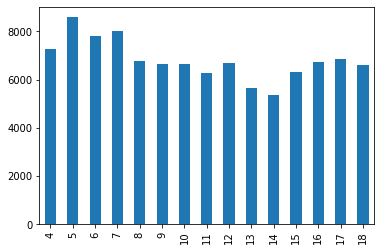

In [22]:
df_polizas_pivoted[df_polizas_pivoted["periodo_baja"] > -1]["periodo_baja"].value_counts().sort_index().plot.bar()

In [23]:
df_bajas = pd.DataFrame(df_polizas_pivoted.index)

In [24]:
df_bajas = df_bajas.set_index('CIF_ID')

In [25]:
df_bajas["hist_polizas"] = df_polizas_pivoted["history"]
df_bajas["periodo_baja"] = df_polizas_pivoted["periodo_baja"]

In [26]:
df_bajas

,hist_polizas,periodo_baja
CIF_ID,,
1313.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1,-1
1482.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1,-1
1559.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1,-1
1779.0,0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1,-1
2994.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1,-1
4431.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1,-1
4673.0,1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0,6
5049.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0,18
5096.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1,-1


In [27]:
len(df_bajas)

405367

In [28]:
df_bajas.reset_index().to_feather('../../../data/processed/periodos_baja_x_cif_id.feather')

Some stats

In [29]:
import pandas as pd
df_bajas = pd.read_feather('../../../data/processed/periodos_baja_x_cif_id.feather')

[Text(0, 0.5, 'Bajas'), Text(0.5, 0, 'Periodo')]

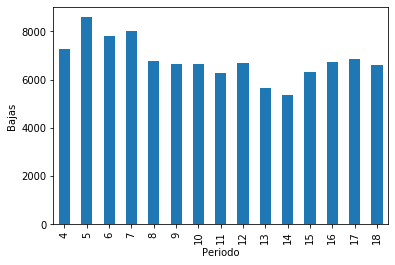

In [30]:
df_bajas[df_bajas["periodo_baja"] > -1]["periodo_baja"].value_counts().sort_index().plot.bar().set(xlabel="Periodo", ylabel="Bajas")

[Text(0, 0.5, ''), Text(0.5, 0, 'Baja')]

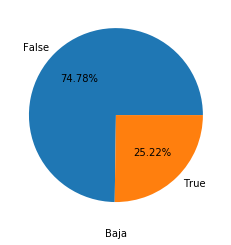

In [31]:
(df_bajas["periodo_baja"] > 0).value_counts().plot.pie(autopct='%1.2f%%').set(xlabel="Baja", ylabel="")